k-mean cluster 알고리즘 배우자~
클러스트 중심(cluster center/centroid)로 그룹을 묶음
작동 방식의 순서는
1. 무작위로 k개의 클러스터 중심을 정함
2. 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터의 샘플로 지정
3. 클러스터에 속한 샘플의 평균값으로 클러스터 중심이 변화함
4. 클러스터 중심의 변화가 없을 때까지 반복함

In [1]:
!wget http://bit.ly/fruits_300_data -O fruits_300.npy

--2025-11-09 23:20:11--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2025-11-09 23:20:12--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 20.200.245.247
Connecting to github.com (github.com)|20.200.245.247|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2025-11-09 23:20:12--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... con

In [2]:
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)
#샘플 수 몇개인지 몰라~자동으로 계산해서 맞춰줘~~

In [3]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)
print(km.labels_)
#3개의 그룹으로 나눔, 그럼 0,1,2의 그룹으로 나누게 된다.
#이 레이블은 labels_에 저장됨.
#fruits라는 샘플 전체를 3개의 그룹으로 나누고 0,1,2라고 분류하고 그걸 labels_로 불러와서 본거다

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [4]:
print(np.unique(km.labels_,return_counts=True))

(array([0, 1, 2], dtype=int32), array([112,  98,  90]))


레이블 0,1,2가 된거 확인, 각 레이블에 112개, 98개, 90개로 샘플이 나누어 진 것을 알 수 있음.
 dtype은 “배열 원소의 데이터 타입”을 뜻합니다. 여기서 dtype=int32는 라벨 배열의 각 값이 32비트 정수형으로 저장되어 있다는 의미입니다.

In [5]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n=len(arr)
    rows=int(np.ceil(n/10))
    cols=n if rows < 2 else 10
    fig, axs = plt. subplots(rows, cols,
                             figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n:
                axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
                axs[i,j].axis('off')

plt.show()

def : 정의한다~ 여러 줄의 코드를 한 묶음으로 하여 마법주문 만들어 놓음 나중에 마법주문을 print하면 여러 줄의 코드가 한번에 실행됨
draw_fruits라는 주문은 arr(이미지의 리스트)를 비율 1로 할거야~
len(x)는 x의 길이(개수), 그리려는 이미지가 몇 개인지 먼저 세어 n에 담고, 이후 행(rows)과 열(cols) 계산에 n을 사용해 서브플롯 격자 크기를 결정합니다.
1행에 최대 10개씩 배치한다~
10개 넘으면 다음 행으로~
열은 한 행만 필요하면 열 수는 n, 두 행 이상이면 10으로 고정합니다.
rows×cols 격자의 서브플롯을 만들고, 전체 그림 크기를 ratio에 맞게 설정합니다. squeeze=False로 항상 2차원 배열 형태의 axs를 받습니다.
if i*10 + j < n:
실제 이미지 개수보다 인덱스가 크지 않을 때만 그림을 배치합니다. (한 행 10개 가정에 맞춰 인덱스를 계산)
**이건 코드를 정의하는거라서 실제로 출력되지 않음!!!
코드가 실제로 draw_fruits를 호출하지 않음
함수만 정의하고 draw_fruits(arr)를 호출하지 않으면 아무것도 표시되지 않습니다. 반드시 draw_fruits(arr); plt.show() 순으로 실행해야 합니다.

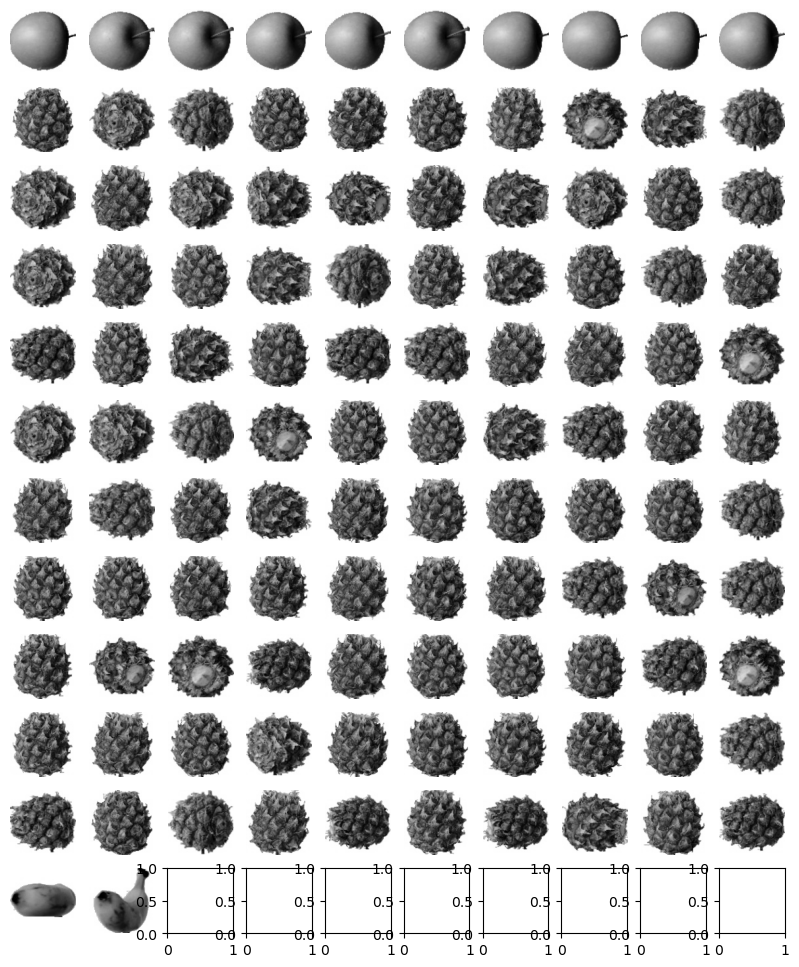

In [6]:
draw_fruits(fruits[km.labels_==0])
#위 주문(draw_fruits)에 원본 fruits(300,100,100)넣은거야~
#그 중 라벨 0으로 된 샘플을 불리언 인덱싱으로 골라서 출력한거임
#km.labels_ == 0: 레이블이 0인 위치만 True인 불리언 마스크를 만듭니다.
#==이게 불리언 인덱싱 설정한 거인가?

마법주문을 print하는데 km.label_이 0으로 라벨된 애들만 보여줘~
112개의 샘플이 0으로 라벨링 되었다는데 뭔지 함 볼까??!!

불리언 인덱싱(Boolean indexing)은 True/False 값으로 이루어진 “마스크”를 사용해 배열이나 데이터프레임에서 조건을 만족하는 원소만 골라내는 인덱싱 방식입니다. 예를 들어 값이 0보다 큰 원소만 선택한다처럼 조건으로 필터링할 때 씁니다.​

핵심 아이디어
조건식을 적용하면 원본과 같은 크기의 불리언 배열이 만들어지고, True인 위치의 값만 선택됩니다.​

불리언 배열의 길이/형상은 인덱싱하려는 대상과 맞아야 합니다. 맞지 않으면 오류가 납니다.​

**km.fit하기 위해 2d 배열로 바꾸어 클러스터 나눔
**계산은 2d로 그리는건 3d(300,100,100)으로 배열을 입력함



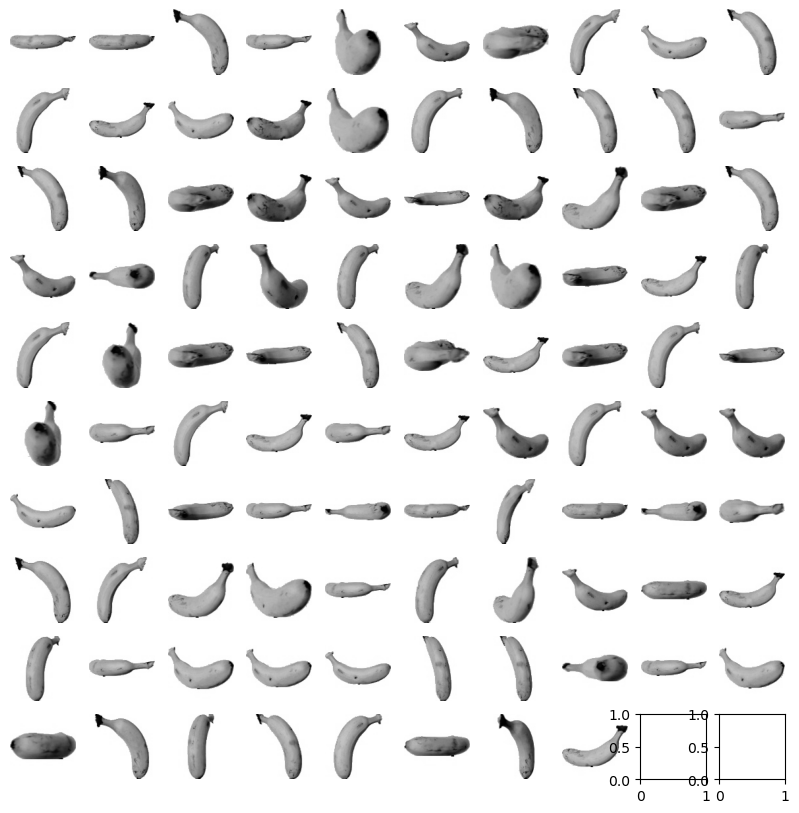

In [7]:
draw_fruits(fruits[km.labels_==1])

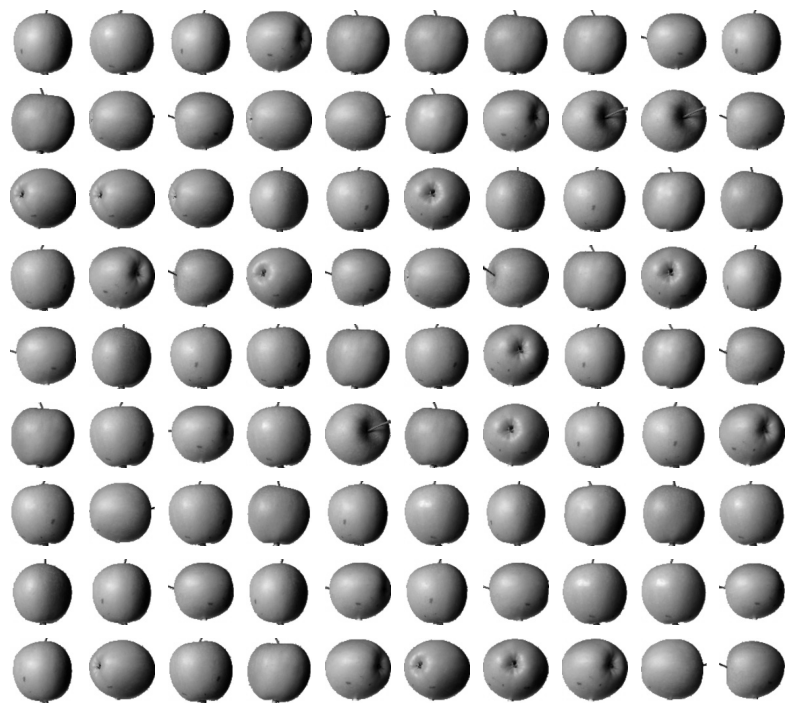

In [8]:
draw_fruits(fruits[km.labels_==2])

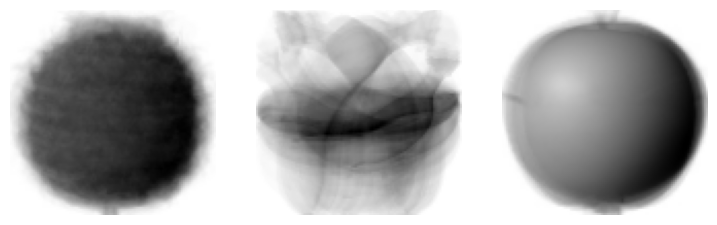

In [9]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=3)

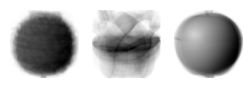

In [10]:
draw_fruits(km.cluster_centers_.reshape(-1,100,100),ratio=1)

근데 cluster의 중심이 뭐지? 그걸 출력한다고 이런 이미지가 나온다고?
그럼 중심은 픽셀명암값이란건가?
설명을 보니 맞군.. 중심값은 2d로 변환하여 위치에 따른 픽셀명암값이었어
그 중심값을 기준으로 출력하니 기준이 되는 이미지가 나온거다

In [ ]:
print(km.transform(fruits_2d[100:101]))
#100번째 샘플의 클러스터 중심까지의 거리를 수치화 한거.. 0번 레벨이 제일 가까움
#0번은 파인애플이었는데 맞는지 확인해보자

[[3400.24197319 8837.37750892 5279.33763699]]


In [13]:
print(km.predict(fruits_2d[100:101]))

[0]


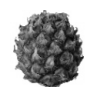

In [14]:
draw_fruits(fruits[100:101])

In [ ]:
print(km.n_iter_)
#KMeans 이건 몇번 반복했을까? 알아보는 코드!

4


지금까지는 3개의 클러스터로 알아서 나눠줘~ 였다면
최적의 클러스터수를 알아보는 알고리즘 배워보자
실제로 수만개의 이미지를 내가 모르는 규칙으로 나눠지는데
그게 몇개로 나누는지에 따라 결과가 다르겠지

이번 강의에서는 엘보우(팔꿈치! 킥!)방법의 이너셔(inertia) 값으로 확인할거야~
팔꿈치 모양으로 이너셔값이 확 꺾이는 지점! 그 지점을 찾는 알고리즘 배워보자~

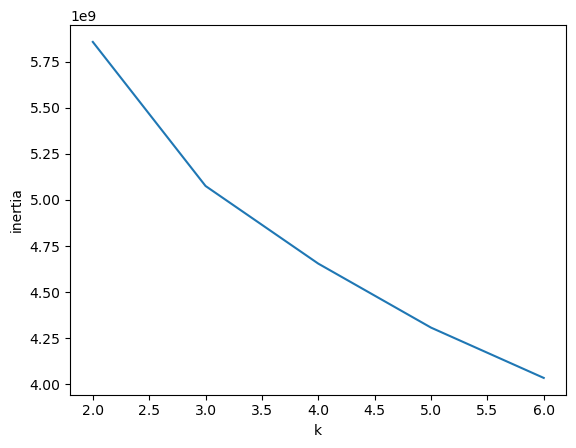

In [16]:
inertia=[]
for k in range(2,7):
    km=KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7),inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

1. for 문은 “2부터 6까지의 k 값 각각에 대해 같은 작업을 반복”하기 위해 쓰입니다. 즉, k를 바꾸어 여러 번 KMeans를 학습시키고, 각 k의 이너셔(inertia)를 리스트에 모아 엘보우 그래프를 그리려는 목적입니다.
2. n_init='auto'는 KMeans가 초기 중심을 여러 번 다르게 시도해 본 뒤 가장 좋은 해를 선택하도록, 데이터 차원·클러스터 수에 따라 “적절한 반복 횟수”를 자동으로 결정하라는 설정입니다.
3. inertia.append(km.inertia_)에서 append는 리스트 inertia의 맨 끝에 km.inertia_ 값을 하나 추가한다는 뜻입니다.